<h1>Importacion de librerias necesarias para el desarrollo del modelo</h1>

In [23]:
# Manipulacion de datos
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
import optbinning
from sklearn.preprocessing import OrdinalEncoder

#Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#Preprocesamiento
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection, linear_model
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

#Estilo de las graficas
sns.set_style('whitegrid')

In [24]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


Chi cuadrado

X = df.drop('bad_loan', axis = 1)
Y = df['bad_loan']
categorical_features = X.select_dtypes(exclude='number')
numerical_features = X.select_dtypes(exclude='object')
chi2_check = {}
for column in categorical_features:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(Y, X[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p,10))

anova

numerical_features.fillna(numerical_features.mean(), inplace = True)
_statistic, p_values = f_classif(numerical_features, Y)
 #convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': numerical_features.columns.values,
					'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
columns_to_drop_f = ANOVA_F_table.iloc[20:,0].to_list()
df.drop(columns = columns_to_drop_f, inplace=True)
columns_to_drop_f

In [25]:
# Carga de datos
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [26]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [27]:
# Tamaño del dataset
df.shape

(32581, 12)

In [28]:
#informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [29]:
#conteo de valores nulos
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [30]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [31]:
#Eliminar filas con valores nulos y verificar
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [32]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28633,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
28634,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
28635,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28636,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
28637,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [33]:
#conteo de valores unicos
df.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [34]:
#Estadisticos descriptivos para variables numericas
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [35]:
#Estadisticos descriptivos para variables categoricas
df.describe(include=['object'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,28638,28638,28638,28638
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,14551,5704,9402,23535


In [36]:
#Verificar si hay valores duplicados
df.duplicated().sum()

137

In [37]:
#Eliminar valores duplicados
df.drop_duplicates(inplace=True)

In [38]:
#Verificar que se eliminaron los valores duplicados
df.shape

(28501, 12)

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


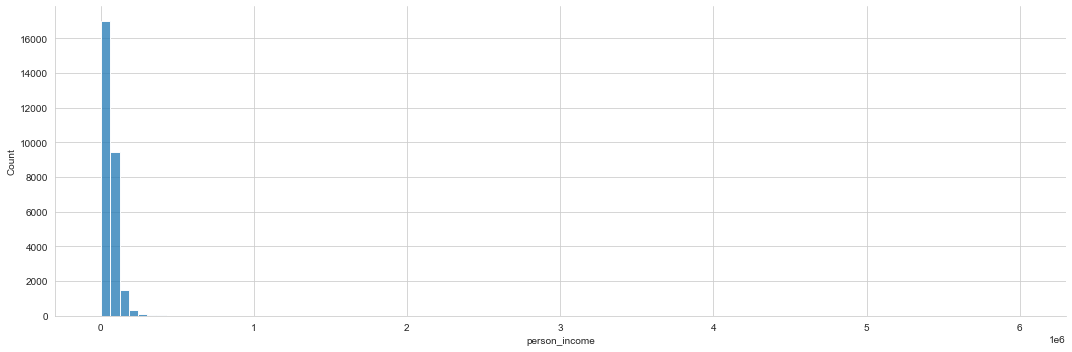

In [39]:
#Grafico de la variable person_income para ver su distribucion
sns.displot(df['person_income'], aspect=3, bins=100)
plt.show()

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


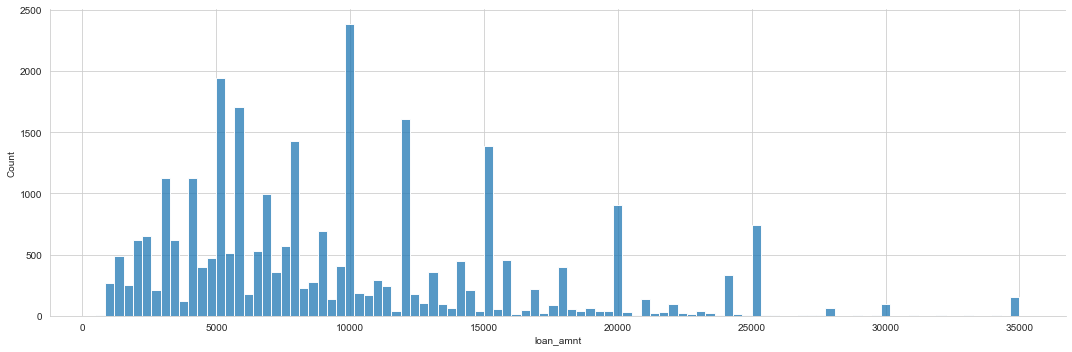

In [40]:
#Grafico de la variable loan_amnt para ver su distribucion
sns.displot(df['loan_amnt'], aspect=3, bins=100)
plt.show()

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


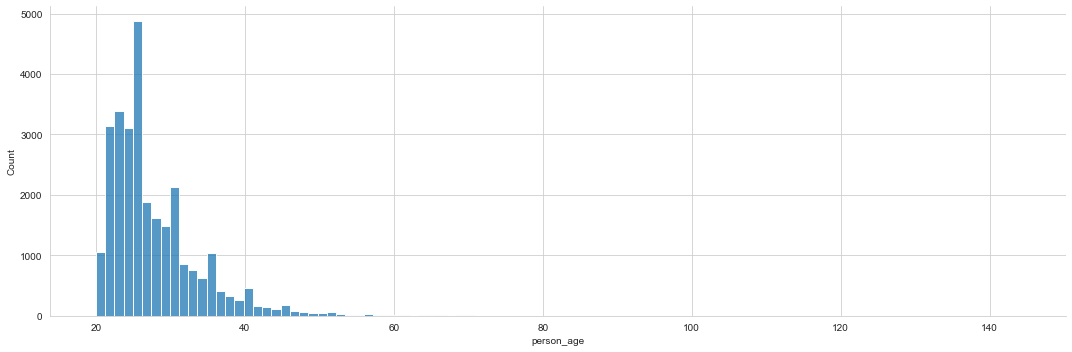

In [41]:
#Grafico de la variable person_age para ver su distribucion
sns.displot(df['person_age'], kde=False, bins=100, aspect=3)
plt.show()

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


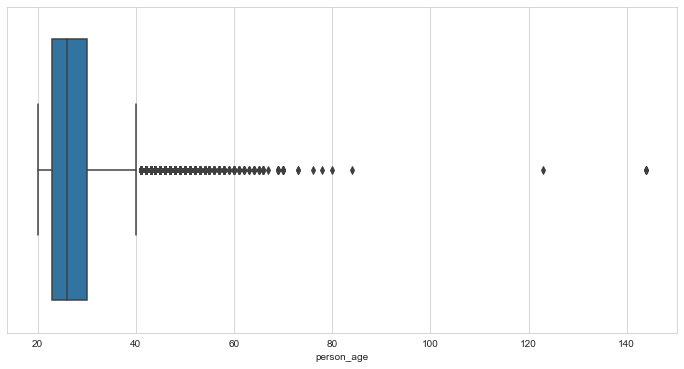

In [42]:
#Grafico de caja de la variable person_age para verificar outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['person_age'])
plt.show()

### En el grafico no se observan datos erroneos relacionados con la edad (0 < o > 90 años). En la tabla relacionada a los estadisticos descriptivos se observa un valor maximo de 144 para la variable graficada lo cual es un valor incorrecto y que debe ser corregido. Ademas en el boxplot se puede verificar la existencia de datos outliers.

In [43]:
#Verificar cuantas entradas de la variable person_age son mayores a 100
df[df['person_age'] > 60]['person_age'].count()

58

In [44]:
#eliminar las entradas de la variable person_age mayores a 100
df = df[df['person_age'] <= 80]

### El mismo proceso se realiza para la variable person_emp_length

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


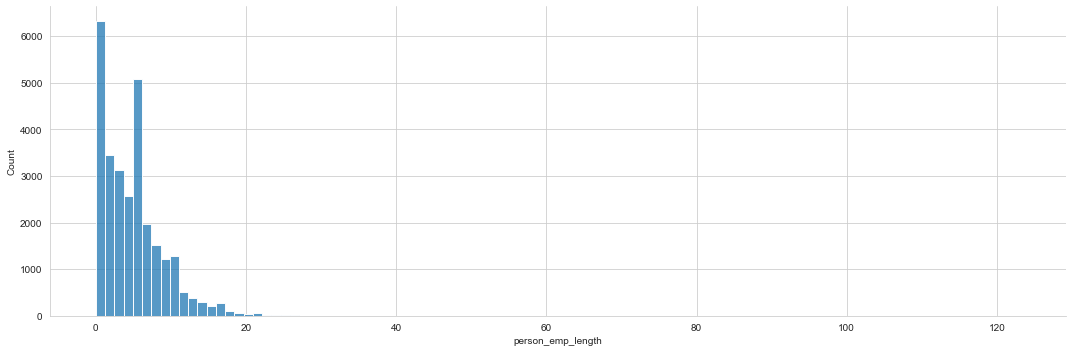

In [45]:
#Grafico de la variable person_emp_length para ver su distribucion
sns.displot(df['person_emp_length'], kde=False, bins=100, aspect=3)
plt.show()

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


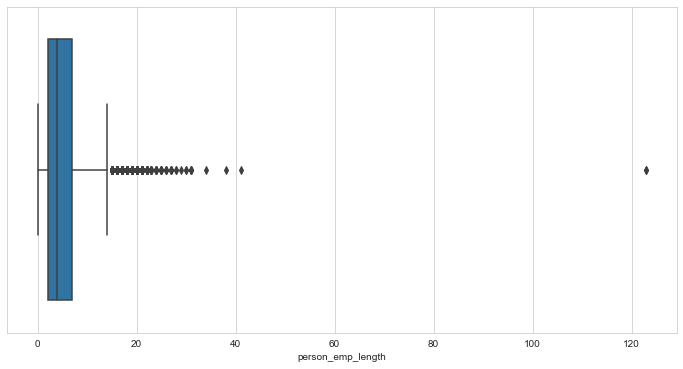

In [46]:
#Grafico de caja de la variable person_emp_lenght para verificar outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['person_emp_length'])
plt.show()

### En el grafico no se observan datos erroneos relacionados con los años que el usuario ha trabajado (0 < o > 40 años). En la tabla relacionada a los estadisticos descriptivos se observa un valor maximo de 123 años para la variable graficada lo cual es un valor incorrecto y que debe ser corregido. Ademas en el boxplot se puede verificar la existencia de datos outliers.

In [47]:
#Verificar cuantas entradas de la variable person_emp_length son mayores a 40
df[df['person_emp_length'] > 30]['person_emp_length'].count()

9

In [48]:
#eliminar las entradas de la variable person_emp_length mayores a 40
df = df[df['person_emp_length'] <= 30]

### Luego de tratas con estos datos nulos observemos la correlacion existente entre las variables para tener una idea de cual de cuales tienen un aporte significativo

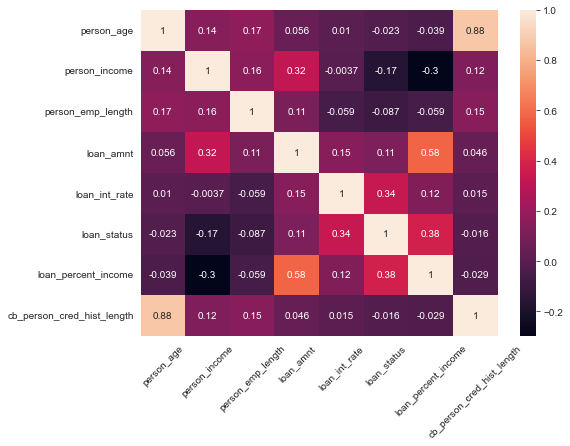

In [49]:
##Grafico de calor para ver la correlacion entre las variables numericas
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.xticks(rotation=45)
plt.show()

# Discretizacion de datos

### Se discretizaran las siguientes variables continuas (	person_age	person_income loan_amnt), agrupando sus valores en categorias especificas 

## Analisis de rangos

In [50]:
# analizar posibles rangos y cantidad de datos en cada rango para la columna person_age
def age_group(arr):
  for i in range(len(arr)-1):
    next_value = arr[i+1]
    values = df['person_age'].between(arr[i], next_value, inclusive='both').sum()
    print(f'cantidad de datos entre {arr[i]} y {arr[i+1]} = {values}')
age_group([20, 25, 30, float('inf')])

cantidad de datos entre 20 y 25 = 13389
cantidad de datos entre 25 y 30 = 10983
cantidad de datos entre 30 y inf = 7923


In [51]:
# analizar posibles rangos y cantidad de datos en cada rango para la columna person_income
valor_max = df['person_income'].max()
valor_min = df['person_income'].min()

def income_group(arr):
  for i in range(len(arr)-1):
    next_value = arr[i+1]
    values = df['person_income'].between(arr[i], next_value, inclusive='both').sum()
    print(f'cantidad de datos entre {arr[i]} y {arr[i+1]} = {values}')
    
income_group([valor_min, 30000, 50000, 70000, 100000, valor_max])

cantidad de datos entre 4000 y 30000 = 3728
cantidad de datos entre 30000 y 50000 = 9100
cantidad de datos entre 50000 y 70000 = 7724
cantidad de datos entre 70000 y 100000 = 6086
cantidad de datos entre 100000 y 2039784 = 4047


In [52]:
#Analizar posibles rangos y cantidad de datos en cada rango para la columna loan_amnt
valor_max = df['loan_amnt'].max()
valor_min = df['loan_amnt'].min()
def loan_group(arr):
  for i in range(len(arr)-1):
    next_value = arr[i+1]
    values = df['loan_amnt'].between(arr[i], next_value, inclusive='both').sum()
    print(f'cantidad de datos entre {arr[i]} y {arr[i+1]} = {values}')
loan_group([valor_min, 5000, 10000, 15000, valor_max])

cantidad de datos entre 500 y 5000 = 8136
cantidad de datos entre 5000 y 10000 = 12329
cantidad de datos entre 10000 y 15000 = 7719
cantidad de datos entre 15000 y 35000 = 5729


## Creacion de nuevas variables

In [53]:
df['age_group'] = pd.cut(df['person_age'], bins=[20, 25, 30, np.inf], labels=['20-25', '25-30', '30+'], include_lowest=True)

In [54]:
df['income_group'] = pd.cut(df['person_income'], bins=[0, 30000, 50000, 70000, 100000, float('inf')], labels=['low', 'low-middle', 'middle', 'middle-high', 'high'])

In [55]:
df['loan_group'] = pd.cut(df['loan_amnt'], bins=[0, 5000, 10000, 15000, float('inf')], labels=['small', 'medium', 'large', 'very large'])

In [56]:
#Verificar que se crearon las columnas
df[['age_group','loan_group','income_group']].head()

,age_group,loan_group,income_group
1,20-25,small,low
2,20-25,medium,low
3,20-25,very large,middle
4,20-25,very large,middle
5,20-25,small,low


In [57]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


## Pruebas de chi2

In [58]:
# Dividir las variables en X y Y (Split) Se va a realizar en proporción 70/30
X = list(df.columns.copy())
X.remove('loan_status')
X = df[X]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 1, stratify = y)

In [59]:
# Se va a reiniciar el index de las variables divididas
# X_train
X_train = X_train.reset_index()
X_train = X_train.drop(['index'],axis=1)
# X_test
X_test = X_test.reset_index()
X_test = X_test.drop(['index'],axis=1)
# y_train
y_train = y_train.reset_index()
y_train = y_train.drop(['index'],axis=1)
y_train = y_train.values.flatten()
# y_test
y_test = y_test.reset_index()
y_test = y_test.drop(['index'],axis=1)
y_test = y_test.values.flatten()

In [60]:
varcontborrar=['person_age','person_income']
for columna in varcontborrar:
    X_train.drop([columna],axis=1,inplace=True)

In [61]:
var_cat=['person_home_ownership',
         'loan_intent','loan_grade',
         'cb_person_default_on_file',
         'cb_person_cred_hist_length',
         'age_group',
         'income_group',
         'loan_group']
var_cont=['person_emp_length',
          'loan_int_rate',
          'loan_percent_income',
          'cb_person_cred_hist_length'
          ]

In [62]:
dfC=df.copy()
varBorrar = ['loan_amnt'
,   'person_age'
,   'person_income']
for columna in varBorrar:
    dfC.drop([columna],axis=1,inplace=True)

In [63]:
dfC.head()

,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_group
1,OWN,5.0,EDUCATION,B,11.14,0,0.10,N,2,20-25,low,small
2,MORTGAGE,1.0,MEDICAL,C,12.87,1,0.57,N,3,20-25,low,medium
3,RENT,4.0,MEDICAL,C,15.23,1,0.53,N,2,20-25,middle,very large
4,RENT,8.0,MEDICAL,C,14.27,1,0.55,Y,4,20-25,middle,very large
5,OWN,2.0,VENTURE,A,7.14,1,0.25,N,2,20-25,low,small


In [64]:
chi2_tabla = {'Variable':[],'Chi P-Value':[]}
for columna in var_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train[columna]))
    chi2_tabla['Variable'].append(columna)
    chi2_tabla['Chi P-Value'].append(p)
chi2_tabla = pd.DataFrame(chi2_tabla)
chi2_tabla.insert(1,'Nombre Variable',var_cat)
chi2_tabla

,Variable,Nombre Variable,Chi P-Value
0,person_home_ownership,person_home_ownership,1.038585e-248
1,loan_intent,loan_intent,4.494534e-67
2,loan_grade,loan_grade,0.000000e+00
3,cb_person_default_on_file,cb_person_default_on_file,5.218054e-145
4,cb_person_cred_hist_length,cb_person_cred_hist_length,4.323630e-02
5,age_group,age_group,4.554048e-04
6,income_group,income_group,3.731360e-293
7,loan_group,loan_group,4.033091e-65


In [65]:
datasetContinuo = X_train[var_cont].copy()
datasetContinuo = datasetContinuo.apply(lambda x: x.fillna(x.median()),axis=0)

###ANOVA para variables continuas

In [66]:
F_statistic, p_values = f_classif(datasetContinuo, y_train)
anovaTabla = pd.DataFrame(data = {'Feature':datasetContinuo.columns.values,'F-Score':F_statistic,'P-Value':p_values})
anovaTablaFeatureName=['person_emp_length',
          'loan_int_rate',
          'loan_percent_income',
          'cb_person_cred_hist_length'
          ]
anovaTabla['Feature']=anovaTablaFeatureName
anovaTabla

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


,Feature,F-Score,P-Value
0,person_emp_length,140.490555,2.669571e-32
1,loan_int_rate,2548.939702,0.000000e+00
2,loan_percent_income,3429.208538,0.000000e+00
3,cb_person_cred_hist_length,3.741087,5.310402e-02


In [67]:
for variable in var_cont:
    X_train[variable] = pd.cut(X_train[variable],10)

In [68]:
X_trainC=X_train.copy()

In [69]:
X_trainNames=list(chi2_tabla['Nombre Variable'])+anovaTablaFeatureName
X_trainC.columns=X_trainNames
X_trainC.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_group,person_emp_length,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,RENT,"(3.0, 6.0]",VENTURE,C,12000,"(12.54, 14.32]","(0.385, 0.462]",N,"(1.972, 4.8]",20-25,low,large
1,MORTGAGE,"(6.0, 9.0]",HOMEIMPROVEMENT,C,3500,"(12.54, 14.32]","(0.077, 0.154]",N,"(1.972, 4.8]",20-25,low-middle,small
2,RENT,"(3.0, 6.0]",DEBTCONSOLIDATION,C,15000,"(12.54, 14.32]","(0.154, 0.231]",N,"(1.972, 4.8]",25-30,middle-high,large
3,MORTGAGE,"(-0.03, 3.0]",HOMEIMPROVEMENT,A,5000,"(7.2, 8.98]","(0.231, 0.308]",N,"(4.8, 7.6]",25-30,low,small
4,RENT,"(3.0, 6.0]",MEDICAL,B,15000,"(10.76, 12.54]","(0.308, 0.385]",N,"(1.972, 4.8]",20-25,low-middle,large


# Alternativa a manejo de datos categoricos con WoE

### Matrices de contingencia

In [70]:
pd.crosstab(df['age_group'], df['loan_status'], normalize='index')

loan_status,0,1
age_group,,
20-25,0.770334,0.229666
25-30,0.791129,0.208871
30+,0.797383,0.202617


In [71]:
pd.crosstab(df['income_group'], df['loan_status'], normalize='index')

loan_status,0,1
income_group,,
low,0.547210,0.452790
low-middle,0.741820,0.258180
middle,0.819342,0.180658
middle-high,0.875779,0.124221
high,0.901992,0.098008


In [72]:
pd.crosstab(df['loan_group'], df['loan_status'], normalize='index')

loan_status,0,1
loan_group,,
small,0.801745,0.198255
medium,0.821212,0.178788
large,0.768846,0.231154
very large,0.672814,0.327186


In [73]:
pd.crosstab(df['loan_grade'], df['loan_status'], normalize='index')

loan_status,0,1
loan_grade,,
A,0.903875,0.096125
B,0.840669,0.159331
C,0.796655,0.203345
D,0.407716,0.592284
E,0.353280,0.646720
F,0.301435,0.698565
G,0.016949,0.983051


In [74]:
pd.crosstab(df['cb_person_default_on_file'], df['loan_status'], normalize='index')

loan_status,0,1
cb_person_default_on_file,,
N,0.817855,0.182145
Y,0.621855,0.378145


In [75]:
pd.crosstab(df['person_home_ownership'], df['loan_status'], normalize='index')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.873625,0.126375
OTHER,0.709677,0.290323
OWN,0.933272,0.066728
RENT,0.687319,0.312681


In [76]:
pd.crosstab(df['loan_intent'], df['loan_status'], normalize='index')

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,0.715417,0.284583
EDUCATION,0.829393,0.170607
HOMEIMPROVEMENT,0.742624,0.257376
MEDICAL,0.730915,0.269085
PERSONAL,0.802266,0.197734
VENTURE,0.853374,0.146626


In [77]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [78]:
train_df=list(df.columns.copy())
train_df =df[train_df]
y=df['loan_status']

In [79]:
target_col = 'loan_status'
drop_cols = ['person_age', 'person_income','loan_percent_income', target_col]
cat_cols = ['person_home_ownership',
         'loan_intent','loan_grade',
         'cb_person_default_on_file',
         'cb_person_cred_hist_length',
         'age_group',
         'income_group',
         'loan_group']
cont_cols=['person_emp_length',
          'loan_int_rate',
          'cb_person_cred_hist_length'
          ]
train_cols = [col for col in train_df.columns if col not in drop_cols]

In [80]:
iv_score_dict = {}
for col in tqdm(train_cols):
    if col in cat_cols:
        optb = optbinning.OptimalBinning(dtype='categorical')
        optb.fit(train_df[col], train_df['loan_status'])
    else:
        optb = optbinning.OptimalBinning(dtype='numerical')
        optb.fit(train_df[col], train_df['loan_status'])
    binning_table = optb.binning_table
    binning_table.build()
    iv_score_dict[col] = binning_table.iv

iv_score_df = pd.Series(iv_score_dict)
iv_score_df.sort_values(ascending=False, inplace=True)

100%|██████████| 11/11 [00:00<00:00, 11.43it/s]


In [81]:
iv_score_df.head(12)

loan_grade                    0.891198
loan_int_rate                 0.799560
income_group                  0.384512
person_home_ownership         0.376580
cb_person_default_on_file     0.169901
loan_amnt                     0.099127
loan_intent                   0.097925
loan_group                    0.081194
person_emp_length             0.062583
cb_person_cred_hist_length    0.006862
age_group                     0.004987
dtype: float64

In [82]:
varmodelo=['loan_status','loan_grade','loan_int_rate','income_group','person_home_ownership','cb_person_default_on_file','loan_amnt','loan_intent','loan_group','person_emp_length']

In [83]:
col = 'person_income'
optb = optbinning.OptimalBinning(dtype='numerical')
optb.fit(train_df[col], train_df['loan_status'])
binning_table = optb.binning_table
display(binning_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 24228.00)",1686,0.059185,761,925,0.548636,-1.477503,0.170514,0.019565
1,"[24228.00, 34999.50)",3533,0.124021,2115,1418,0.401359,-0.882535,0.118603,0.014362
2,"[34999.50, 39937.50)",1995,0.070032,1455,540,0.270677,-0.291151,0.006420,0.000800
3,"[39937.50, 49994.00)",4215,0.147962,3307,908,0.215421,0.010209,0.000015,0.000002
4,"[49994.00, 59982.00)",3845,0.134974,3050,795,0.206762,0.062212,0.000513,0.000064
5,"[59982.00, 79942.50)",6017,0.211219,5083,934,0.155227,0.411838,0.031687,0.003933
6,"[79942.50, 89325.00)",1741,0.061116,1558,183,0.105112,0.859329,0.034613,0.004198
7,"[89325.00, inf)",5455,0.191491,4972,483,0.088543,1.049218,0.152000,0.018174
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [84]:
selected_features = iv_score_df[iv_score_df > 0.1].index.values
cat_cols = [col for col in cat_cols if col in selected_features]
train_cols = [col for col in train_df.columns if col in selected_features]

In [85]:
train_data, valid_data = model_selection.train_test_split(train_df[varmodelo],
test_size=0.3,random_state=42, shuffle=True, stratify=train_df['loan_status'])

train_data.shape, valid_data.shape

((19940, 10), (8547, 10))

In [86]:

cat_cols = [col for col in cat_cols if col in selected_features]
train_cols = [col for col in train_df.columns if col in selected_features]

In [87]:
X_train = train_data[train_cols].copy()
y_train = train_data[target_col].copy()

X_valid = valid_data[train_cols].copy()
y_valid = valid_data[target_col].copy()

In [88]:
binning_process = optbinning.BinningProcess(                             
    variable_names=train_cols,
    #selection_criteria=selection_criteria,
    categorical_variables=cat_cols
)

##Scorecard

In [89]:
estimator = linear_model.LogisticRegression()

In [90]:
scorecard = optbinning.Scorecard(
    binning_process=binning_process,
    estimator=estimator, 
    scaling_method="min_max",
    scaling_method_params={"min": 300, "max": 850},
    # scaling_method = "pdo_odds",
    # scaling_method_params = {"pdo": 20, "odds": 50, "scorecard_points": 100},
    #intercept_based=True,
    #reverse_scorecard=True
)

In [91]:
scorecard.fit(X_train, y_train)

c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Scorecard(binning_process=BinningProcess(categorical_variables=['person_home_ownership',
                                                                'loan_grade',
                                                                'cb_person_default_on_file',
                                                                'income_group'],
                                         variable_names=['person_home_ownership',
                                                         'loan_grade',
                                                         'loan_int_rate',
                                                         'cb_person_default_on_file',
                                                         'income_group']),
          estimator=LogisticRegression(), scaling_method='min_max',
          scaling_method_params={'max': 850, 'min': 300})

In [92]:
# scorecard table
scorecard_df = scorecard.table(style="detailed")

In [93]:
scorecard_df.head()

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,person_home_ownership,0,[OWN],1527,0.076580,1428,99,0.064833,1.386566,0.095141,0.011023,-0.816473,203.928898
1,person_home_ownership,1,[MORTGAGE],8231,0.412788,7195,1036,0.125866,0.655675,0.145338,0.017849,-0.816473,157.811870
2,person_home_ownership,2,"[RENT, OTHER]",10182,0.510632,6987,3195,0.313789,-0.499880,0.145104,0.017951,-0.816473,84.899827
3,person_home_ownership,3,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.816473,116.440751
4,person_home_ownership,4,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.816473,116.440751


In [94]:
scorecard_df.query("Variable == 'loan_int_rate'")

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,loan_int_rate,0,"(-inf, 6.46)",1367,0.068556,1291,76,0.055596,1.550095,0.100991,0.011495,-0.162025,135.849927
1,loan_int_rate,1,"[6.46, 7.46)",1675,0.084002,1535,140,0.083582,1.112299,0.073414,0.008731,-0.162025,130.368161
2,loan_int_rate,2,"[7.46, 7.89)",1729,0.086710,1547,182,0.105263,0.857722,0.048951,0.005938,-0.162025,127.180530
3,loan_int_rate,3,"[7.89, 9.64)",2170,0.108826,1881,289,0.133180,0.590788,0.031758,0.003913,-0.162025,123.838174
4,loan_int_rate,4,"[9.64, 11.27)",3555,0.178285,3002,553,0.155556,0.409332,0.026442,0.003282,-0.162025,121.566110
5,loan_int_rate,5,"[11.27, 12.11)",1809,0.090722,1499,310,0.171365,0.293637,0.007175,0.000894,-0.162025,120.117463
6,loan_int_rate,6,"[12.11, 12.76)",1351,0.067753,1093,258,0.190970,0.161378,0.001684,0.000210,-0.162025,118.461407
7,loan_int_rate,7,"[12.76, 13.61)",1876,0.094082,1473,403,0.214819,0.013776,0.000018,0.000002,-0.162025,116.613240
8,loan_int_rate,8,"[13.61, 14.37)",1149,0.057623,830,319,0.277633,-0.326110,0.006686,0.000832,-0.162025,112.357440
9,loan_int_rate,9,"[14.37, 15.28)",1185,0.059428,633,552,0.465823,-1.145422,0.099574,0.011808,-0.162025,102.098601


In [95]:
# Se debe de buscar las variables cuyo puntaje sea negativo, luego se ordena del menor al mayor
# 1. Elegir sólo las variables cuyo puntaje sea menor a 0
variablesRiesgosas = scorecard_df[(scorecard_df['Points'] < 0)][["Variable","Points"]]
# 2. Ordenar de menor a mayor
variablesRiesgosas.sort_values(by=['Points'])
# 3. Exponer estas variables en el reporte técnico

,Variable,Points
3,loan_grade,-18.553628


In [96]:
train_data['predict_proba'] = scorecard.predict_proba(X_train)[:, 1]
valid_data['predict_proba'] = scorecard.predict_proba(X_valid)[:, 1]


c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pixel\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


# Manejo de datos categoricos

### Se procede a convertir las variables categoricas en numericas para ser aceptadas por el modelo, unas se hacen mediante target dummy (datos nominales) y otras se establecen los valores en la misma columna (datos ordinales). Ejemplo: 

<div>
  <table style="margin: 0 auto;">
    <tr>
      <th>Variable_Categorica</th>
      <th>Variable_Numerica</th>
    </tr>
    <tr>
      <td>A</td>
      <td>0</td>
    </tr>
    <tr>
      <td>B</td>
      <td>1</td>
    </tr>
    <tr>
      <td>C</td>
      <td>2</td>
    </tr>
    <tr>
      <td>D</td>
      <td>3</td>
    </tr>
    <tr>
      <td>E</td>
      <td>4</td>
    </tr>
  </table>
</div>

## Datos Ordinales:

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


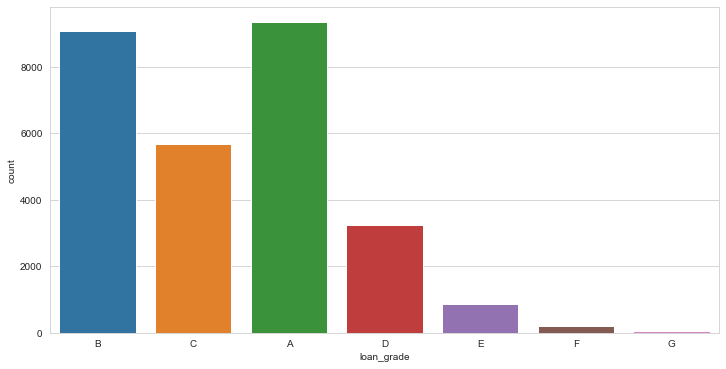

In [97]:
#Grafico de la variable loan_grade para ver el conteo de cada categoria
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='loan_grade')
plt.show()

## NOTA: Preguntar acerca de esta codificacion, ya que con esto asumimos que A es mejor que B, y B es mejor que C y se encuentran equi distantes entre si 

In [98]:
#convertir variable categorica loan_grade a numerica
df['loan_grade'].replace(to_replace=['A', 'B', 'C', 'D', 'E', 'F', 'G'], value=[6, 5, 4, 3, 2, 1, 0], inplace=True)

In [99]:
#verificar que se convirtio la variable loan_grade a numerica
df['loan_grade'].dtype

dtype('int64')

c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pixel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


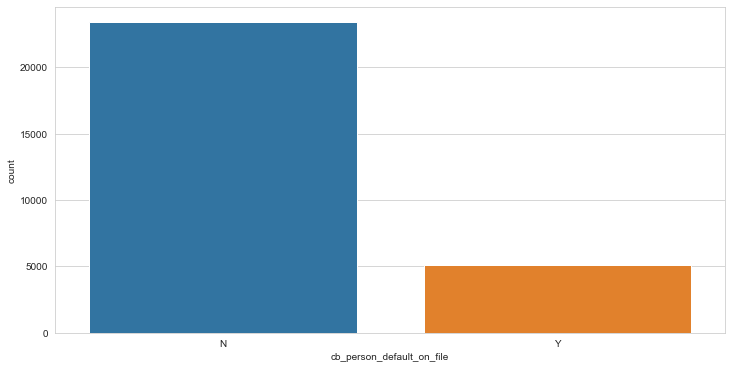

In [100]:
#Grafico de la variable cb_person_default_on_file para ver el conteo de cada categoria
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='cb_person_default_on_file')
plt.show()

In [101]:
#convertir variable categorica cb_person_default_on_file a numerica
df['cb_person_default_on_file'].replace(to_replace=['Y', 'N'], value=[1, 0], inplace=True)

In [102]:
#verificar que se convirtio la variable cb_person_default_on_file a numerica
df['cb_person_default_on_file'].dtype

dtype('int64')

## Datos nominales

person_home_ownership
loan_intent

In [103]:
#Crear codificacion nominal para las variables person_home_ownership, loan_intent
codificador = OneHotEncoder(sparse_output==False)

NameError: name 'sparse_output' is not defined

In [ ]:
#Columnas categoricas a transformar
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_group', 'age_group', 'income_group']

In [ ]:
valores_unicos_categoria = {}
for i in cat_cols:
  valores_unicos_categoria[i] = df[i].unique()

KeyError: 'person_home_ownership'

In [ ]:
valores_unicos_categoria

{'person_home_ownership': array(['OWN', 'MORTGAGE', 'RENT', 'OTHER'], dtype=object),
 'loan_intent': array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
        'DEBTCONSOLIDATION'], dtype=object),
 'loan_group': ['small', 'medium', 'very large', 'large']
 Categories (4, object): ['small' < 'medium' < 'large' < 'very large'],
 'age_group': ['20-25', '25-30', '30+']
 Categories (3, object): ['20-25' < '25-30' < '30+'],
 'income_group': ['low', 'middle', 'middle-high', 'high', 'low-middle']
 Categories (5, object): ['low' < 'low-middle' < 'middle' < 'middle-high' < 'high']}

In [ ]:
#Crear dataframe con las variables codificadas
df_codificado = pd.DataFrame(codificador.fit_transform(df[cat_cols]), columns=np.concatenate(codificador.categories_))
df_codificado.head()

KeyError: "['person_home_ownership', 'loan_intent', 'age_group', 'income_group'] not in index"

In [ ]:
#Unir el dataframe codificado con el dataframe original y eliminar las variables que ya fueron codificadas
df = pd.concat([df, df_codificado], axis=1)
df.drop(['person_home_ownership', 'loan_intent', 'age_group', 'loan_group', 'income_group'], axis=1, inplace=True)
df.head()

NameError: name 'df_codificado' is not defined

In [ ]:
df.isna().sum()

person_age                    144
person_income                 144
person_emp_length             144
loan_grade                    144
loan_amnt                     144
loan_int_rate                 144
loan_status                   144
loan_percent_income           144
cb_person_default_on_file     144
cb_person_cred_hist_length    144
MORTGAGE                      144
OTHER                         144
OWN                           144
RENT                          144
DEBTCONSOLIDATION             144
EDUCATION                     144
HOMEIMPROVEMENT               144
MEDICAL                       144
PERSONAL                      144
VENTURE                       144
large                         144
medium                        144
small                         144
very large                    144
20-25                         144
25-30                         144
30+                           144
high                          144
low                           144
low-middle    